# Importing Dataset from Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install -U pandasql
import pandasql as ps
from sklearn.metrics import accuracy_score

sns.set(style= 'whitegrid', color_codes=True)
# %matplotlib inline

# Importing Dataset

In [ ]:
accident_data_frame = pd.read_csv('/content/drive/MyDrive/Major Project/UK_Accident.csv')

# Analysing Dataset

In [ ]:
accident_data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1504150 entries, 0 to 1504149
Data columns (total 33 columns):
 #   Column                                       Non-Null Count    Dtype  
---  ------                                       --------------    -----  
 0   Unnamed: 0                                   1504150 non-null  int64  
 1   Accident_Index                               1504150 non-null  object 
 2   Location_Easting_OSGR                        1504049 non-null  float64
 3   Location_Northing_OSGR                       1504150 non-null  float64
 4   Longitude                                    1504049 non-null  float64
 5   Latitude                                     1504150 non-null  float64
 6   Police_Force                                 1504150 non-null  int64  
 7   Accident_Severity                            1504150 non-null  int64  
 8   Number_of_Vehicles                           1504150 non-null  int64  
 9   Number_of_Casualties                         1

In [ ]:
accident_data_frame.head()

,Unnamed: 0,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,0,200501BS00001,525680.0,178240.0,-0.191170,51.489096,1,2,1,1,...,Zebra crossing,Daylight: Street light present,Raining without high winds,Wet/Damp,None,None,1,Yes,E01002849,2005
1,1,200501BS00002,524170.0,181650.0,-0.211708,51.520075,1,3,1,1,...,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002909,2005
2,2,200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002857,2005
3,3,200501BS00004,526900.0,177530.0,-0.173862,51.482442,1,3,1,1,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01002840,2005
4,4,200501BS00005,528060.0,179040.0,-0.156618,51.495752,1,3,1,1,...,No physical crossing within 50 meters,Darkness: Street lighting unknown,Fine without high winds,Wet/Damp,None,None,1,Yes,E01002863,2005


## Null Percentage

In [ ]:
(accident_data_frame.isnull().sum()/1504150)*100

Unnamed: 0                                     0.000000
Accident_Index                                 0.000000
Location_Easting_OSGR                          0.006715
Location_Northing_OSGR                         0.000000
Longitude                                      0.006715
Latitude                                       0.000000
Police_Force                                   0.000000
Accident_Severity                              0.000000
Number_of_Vehicles                             0.000000
Number_of_Casualties                           0.000000
Date                                           0.000000
Day_of_Week                                    0.000000
Time                                           0.007778
Local_Authority_(District)                     0.000000
Local_Authority_(Highway)                      0.000000
1st_Road_Class                                 0.000000
1st_Road_Number                                0.000000
Road_Type                                      0

#### Location_Easting_OSGR, Longitude, Time, Pedestrian_Crossing-Human_Control, Pedestrian_Crossing-Physical_Facilities,LSOA_of_Accident_Location
## These columns consists null values

In [ ]:
accident_data_frame.shape

(1504150, 33)

In [ ]:
accident_data_frame.sample(10)

,Unnamed: 0,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
56027,56027,2.01E+12,436840.0,567440.0,-1.425619,55.000198,10,3,1,1,...,No physical crossing within 50 meters,Daylight: Street light present,Raining without high winds,Wet/Damp,None,None,1,Yes,E01008596,2005
843935,273924,2.01044E+12,437550.0,113670.0,-1.467166,50.921210,44,3,2,1,...,non-junction pedestrian crossing,Daylight: Street light present,Fine without high winds,Wet/Damp,None,None,1,Yes,E01017239,2010
178550,178550,2.01E+12,328680.0,184920.0,-3.030211,51.558587,61,3,2,1,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,2,Yes,W01001656,2005
821155,251144,2.01035E+12,546030.0,309730.0,0.157990,52.665589,35,3,2,1,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01018093,2010
457572,457572,200720D288303,414310.0,284010.0,-1.790857,52.453829,20,3,2,2,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,No,E01009315,2007
560884,560884,2.01E+12,313380.0,693910.0,-3.395154,56.130073,94,2,1,1,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,Ol or diesel,None,2,Yes,NaN,2007
947620,377609,2011170M11631,450170.0,519340.0,-1.225557,54.566818,17,3,2,1,...,No physical crossing within 50 meters,Daylight: Street light present,Raining without high winds,Wet/Damp,None,None,1,Yes,E01012094,2011
485217,485217,2.01E+12,461220.0,304690.0,-1.096794,52.636485,33,3,2,1,...,No physical crossing within 50 meters,Darkness: Street lighting unknown,Fine without high winds,Dry,None,None,1,No,E01013662,2007
1373800,334347,201401RG40274,542700.0,174430.0,0.052282,51.450824,1,2,1,1,...,Pedestrian phase at traffic signal junction,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01001609,2014
726419,156408,2.00995E+12,302000.0,668540.0,-3.568902,55.900011,95,3,2,1,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,NaN,2009


In [ ]:
accident_data_frame.notnull().count()

Unnamed: 0                                     1504150
Accident_Index                                 1504150
Location_Easting_OSGR                          1504150
Location_Northing_OSGR                         1504150
Longitude                                      1504150
Latitude                                       1504150
Police_Force                                   1504150
Accident_Severity                              1504150
Number_of_Vehicles                             1504150
Number_of_Casualties                           1504150
Date                                           1504150
Day_of_Week                                    1504150
Time                                           1504150
Local_Authority_(District)                     1504150
Local_Authority_(Highway)                      1504150
1st_Road_Class                                 1504150
1st_Road_Number                                1504150
Road_Type                                      1504150
Speed_limi

#### As NULL values are less as compared to size of whole data
#### So, Preprocessing the data and filling the null values with logically identified values from each feature.

In [ ]:
size_gb = accident_data_frame.groupby(by='Day_of_Week').size()
dev_color= size_gb.argsort().argsort() # argsort for index wise sorting
pal= sns.color_palette('Reds', len(dev_color)) # choose color palette accordingly

In [ ]:
accident_data_frame['Road_Surface_Conditions'].fillna(value = 'Normal', inplace = True)
accident_data_frame['Special_Conditions_at_Site'].fillna(value = 'None', inplace = True)
accident_data_frame['Carriageway_Hazards'].fillna(value = 'None', inplace = True)
accident_data_frame['Did_Police_Officer_Attend_Scene_of_Accident'].fillna(value = 'No', inplace = True)
accident_data_frame['Weather_Conditions'].fillna(value = 'Unknown', inplace = True)
accident_data_frame['Junction_Control'].fillna(value = 'None', inplace = True)
accident_data_frame['Location_Northing_OSGR'].fillna(value = 0, inplace = True)
accident_data_frame['Latitude'].fillna(value = 0, inplace = True)

### Analysing Casualities

In [ ]:
data = {'Casualties_Count' : accident_data_frame['Number_of_Casualties'],
             'Day_of_Week' : accident_data_frame['Day_of_Week']}
accidents_per_week = pd.DataFrame(data)
accidents_per_week.groupby(by='Day_of_Week').sum().sort_values(by = 'Casualties_Count', ascending = False)

,Casualties_Count
Day_of_Week,
6,331934
5,299044
4,297756
3,294476
7,285261
2,284043
1,239532


In [ ]:
cas_count = accidents_per_week.groupby(by='Day_of_Week').sum().sort_values(by = 'Casualties_Count', ascending = False)

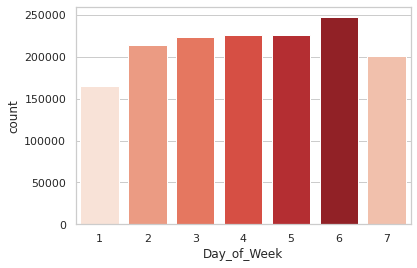

In [ ]:
sns.countplot(x=accidents_per_week.Day_of_Week,
              data=accidents_per_week,
              palette=np.array(pal[::])[dev_color])

<ul>
<li> <h3>6th day of the week has seen more number of accidents<h3/>
</ul>

### Analysing Speed Limit of the Driver

In [ ]:
accidents_per_week['Speed_Limit'] = accident_data_frame.Speed_limit
accidents_per_week.sample(10)

,Casualties_Count,Day_of_Week,Speed_Limit
1229785,2,3,30
965151,2,1,30
377359,2,6,70
1030070,1,2,30
696536,1,4,70
791279,1,2,30
185597,1,3,60
1380362,2,3,30
1368199,1,7,50
105913,2,2,60


In [ ]:
chunks = []
for val in range(1,8) : # Since there are 7 days, we're using the loop from 1 to 8.
    qurery1 = """select accidents_per_week.Day_of_Week, sum(accidents_per_week.Casualties_Count) Casualties_Count,
            max(accidents_per_week.Speed_Limit) Max_Speed ,min(accidents_per_week.Speed_Limit) Min_Speed
            from accidents_per_week where accidents_per_week.Casualties_Count > 0 and accidents_per_week.Day_of_Week= """+str(val)
    chunks.append(ps.sqldf(qurery1, locals())) # parameters (Query, db_url) and returns DataFrame

speed_limit_accident_data = pd.concat(chunks, ignore_index=True) # concatination of chunks

### Min Speed and Max Speed during days of the week

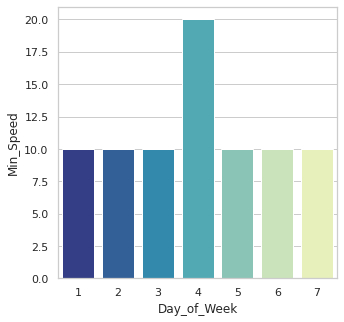

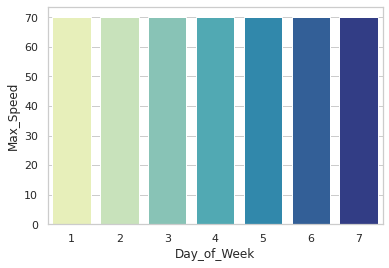

In [ ]:
val = ["Max-Speed","Min_Speed"]
plt.figure(figsize=(5,5))
sns.barplot(x='Day_of_Week', y = 'Min_Speed' , data=speed_limit_accident_data, palette='YlGnBu_r')
plt.show()
sns.barplot(x='Day_of_Week', y = 'Max_Speed' , data=speed_limit_accident_data, palette='YlGnBu')
plt.show()

### Analysis of Accident Due to Light Condition

In [ ]:
accident_severity_data = {'Light_Conditions' : accident_data_frame.Light_Conditions,
                          'Weather_Conditions' : accident_data_frame.Weather_Conditions,
                          'Accident_Severity' : accident_data_frame.Accident_Severity}
accident_severity_df = pd.DataFrame(accident_severity_data)
accident_severity_df.sample(10)

,Light_Conditions,Weather_Conditions,Accident_Severity
790261,Daylight: Street light present,Fine without high winds,3
329002,Darkness: Street lights present and lit,Fine without high winds,3
830892,Darkeness: No street lighting,Fine without high winds,3
819163,Daylight: Street light present,Fine without high winds,3
661740,Darkness: Street lights present and lit,Fine without high winds,3
1245952,Daylight: Street light present,Fine without high winds,3
268341,Daylight: Street light present,Fine without high winds,2
699588,Daylight: Street light present,Raining without high winds,3
526240,Daylight: Street light present,Raining without high winds,3
1181538,Darkness: Street lighting unknown,Fine without high winds,3


In [ ]:
print(accident_severity_df.describe(),'\n')

       Accident_Severity
count       1.504150e+06
mean        2.838190e+00
std         4.018423e-01
min         1.000000e+00
25%         3.000000e+00
50%         3.000000e+00
75%         3.000000e+00
max         3.000000e+00 



In [ ]:
# Converting Object data-type into Category datatype
for object_feature in accident_severity_df.dtypes[accident_severity_df.dtypes == 'object'].index :
     accident_severity_df[object_feature] = accident_severity_df[object_feature].astype('category')

In [ ]:
# Getting the information of the accident severity dataframe after analysis
accident_severity_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1504150 entries, 0 to 1504149
Data columns (total 3 columns):
 #   Column              Non-Null Count    Dtype   
---  ------              --------------    -----   
 0   Light_Conditions    1504150 non-null  category
 1   Weather_Conditions  1504150 non-null  category
 2   Accident_Severity   1504150 non-null  int64   
dtypes: category(2), int64(1)
memory usage: 14.3 MB


### Performing One Hot Encoding on the categorical columns.

In [ ]:
accident_severity_df = pd.get_dummies(data=accident_severity_df, columns=['Light_Conditions', 'Weather_Conditions'])

In [ ]:
accident_severity_df.sample(5)

,Accident_Severity,Light_Conditions_Darkeness: No street lighting,Light_Conditions_Darkness: Street lighting unknown,Light_Conditions_Darkness: Street lights present and lit,Light_Conditions_Darkness: Street lights present but unlit,Light_Conditions_Daylight: Street light present,Weather_Conditions_Fine with high winds,Weather_Conditions_Fine without high winds,Weather_Conditions_Fog or mist,Weather_Conditions_Other,Weather_Conditions_Raining with high winds,Weather_Conditions_Raining without high winds,Weather_Conditions_Snowing with high winds,Weather_Conditions_Snowing without high winds,Weather_Conditions_Unknown
1104664,3,0,0,1,0,0,0,1,0,0,0,0,0,0,0
61953,3,0,0,1,0,0,0,1,0,0,0,0,0,0,0
439937,2,0,0,0,0,1,0,1,0,0,0,0,0,0,0
1234301,3,0,0,1,0,0,0,1,0,0,0,0,0,0,0
616189,3,0,0,0,0,1,0,1,0,0,0,0,0,0,0


### Correlation between 'Accident_Severity' and rest of variables

In [ ]:
accident_severity = accident_severity_df.corr().loc['Accident_Severity':]
accident_severity = pd.DataFrame(accident_severity)

In [ ]:
# np.hstack(np.split(accident_severity, 1))
accident_severity

,Accident_Severity,Light_Conditions_Darkeness: No street lighting,Light_Conditions_Darkness: Street lighting unknown,Light_Conditions_Darkness: Street lights present and lit,Light_Conditions_Darkness: Street lights present but unlit,Light_Conditions_Daylight: Street light present,Weather_Conditions_Fine with high winds,Weather_Conditions_Fine without high winds,Weather_Conditions_Fog or mist,Weather_Conditions_Other,Weather_Conditions_Raining with high winds,Weather_Conditions_Raining without high winds,Weather_Conditions_Snowing with high winds,Weather_Conditions_Snowing without high winds,Weather_Conditions_Unknown
Accident_Severity,1.000000,-0.071174,0.002657,-0.018362,-0.003769,0.053096,-0.005982,-0.025910,-0.004042,0.012961,0.000549,0.018437,0.003080,0.010913,0.017108
Light_Conditions_Darkeness: No street lighting,-0.071174,1.000000,-0.025083,-0.119369,-0.016370,-0.399076,0.018572,-0.074911,0.058249,0.037683,0.048193,0.033486,0.028193,0.031123,-0.015329
Light_Conditions_Darkness: Street lighting unknown,0.002657,-0.025083,1.000000,-0.051555,-0.007070,-0.172360,-0.002335,-0.044742,0.005986,0.002229,0.000384,-0.006382,0.000715,0.003057,0.140243
Light_Conditions_Darkness: Street lights present and lit,-0.018362,-0.119369,-0.051555,1.000000,-0.033648,-0.820269,0.006970,-0.093839,0.011799,0.031787,0.041990,0.081967,0.001151,0.016986,-0.012381
Light_Conditions_Darkness: Street lights present but unlit,-0.003769,-0.016370,-0.007070,-0.033648,1.000000,-0.112492,0.003017,-0.018033,0.005796,0.008136,0.010302,0.012519,0.002725,0.001946,-0.001917
Light_Conditions_Daylight: Street light present,0.053096,-0.399076,-0.172360,-0.820269,-0.112492,1.000000,-0.015741,0.136071,-0.042865,-0.049729,-0.064212,-0.091339,-0.016129,-0.032296,-0.013322
Weather_Conditions_Fine with high winds,-0.005982,0.018572,-0.002335,0.006970,0.003017,-0.015741,1.000000,-0.222582,-0.008224,-0.016776,-0.013166,-0.040677,-0.004015,-0.009670,-0.015425
Weather_Conditions_Fine without high winds,-0.025910,-0.074911,-0.044742,-0.093839,-0.018033,0.136071,-0.222582,1.000000,-0.148175,-0.302260,-0.237214,-0.732891,-0.072337,-0.174238,-0.277918
Weather_Conditions_Fog or mist,-0.004042,0.058249,0.005986,0.011799,0.005796,-0.042865,-0.008224,-0.148175,1.000000,-0.011168,-0.008765,-0.027079,-0.002673,-0.006438,-0.010268
Weather_Conditions_Other,0.012961,0.037683,0.002229,0.031787,0.008136,-0.049729,-0.016776,-0.302260,-0.011168,1.000000,-0.017879,-0.055238,-0.005452,-0.013132,-0.020947


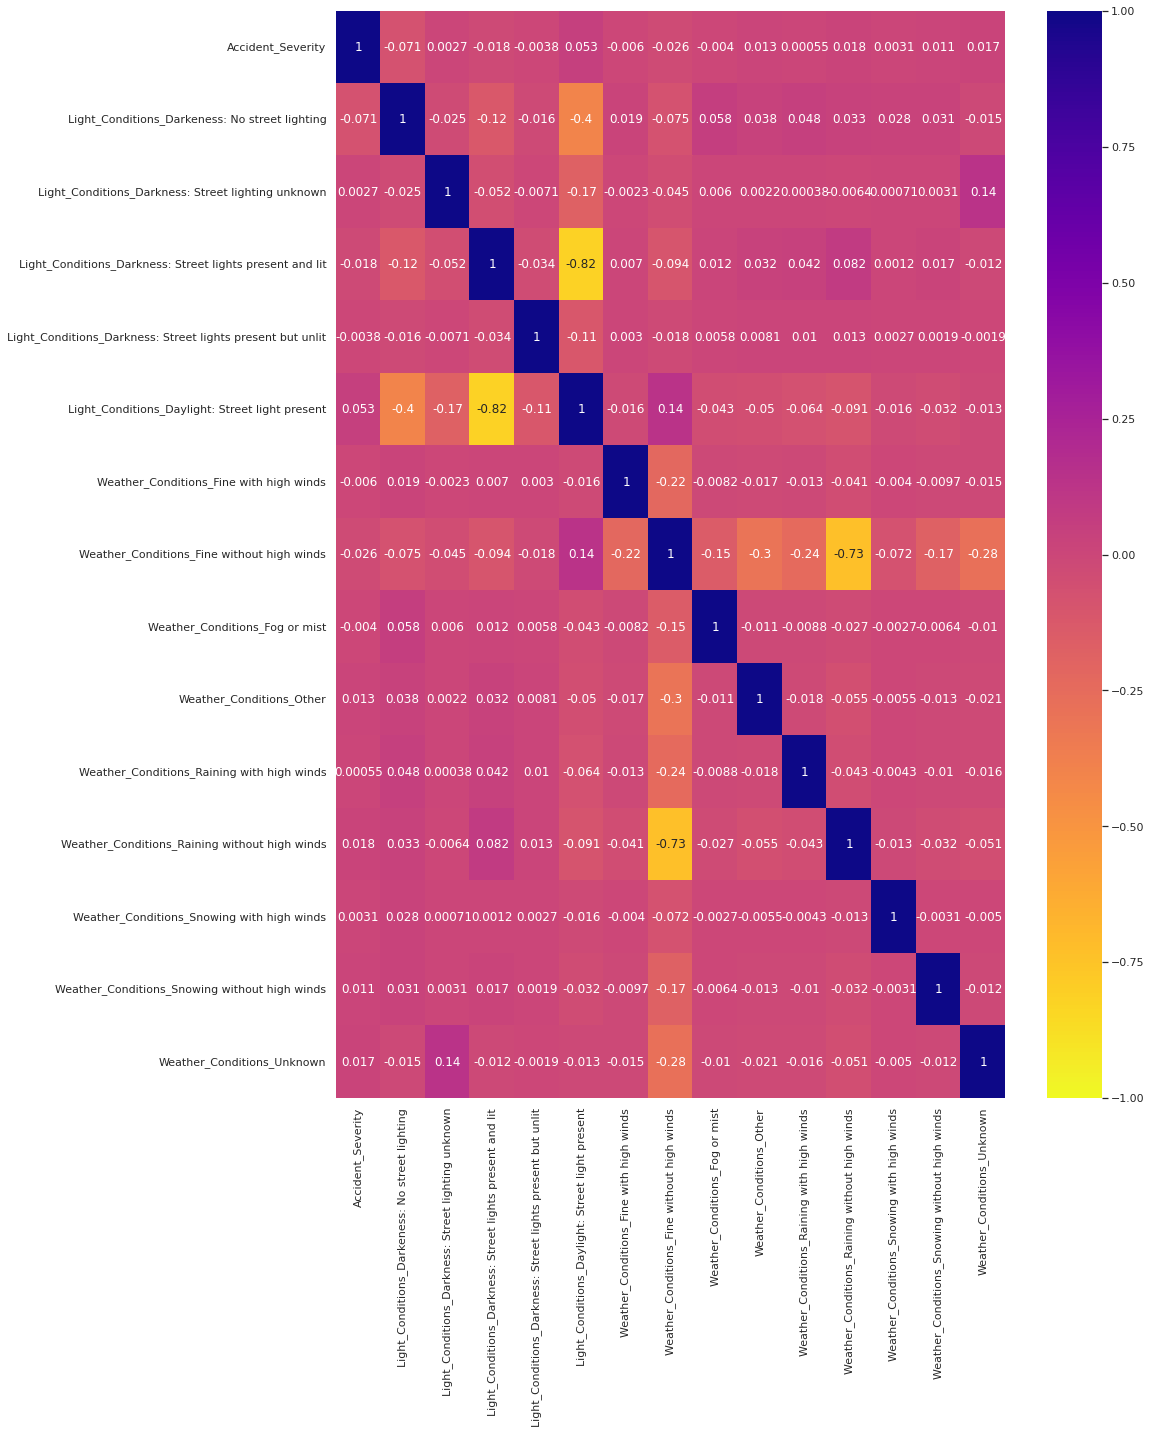

In [ ]:
plt.figure(figsize=(15,20))
sns.heatmap(accident_severity, vmin=-1, cmap='plasma_r', annot = True)

<ul>
<li> <h3>From the above correlation, we have seen that Light_Conditions and Weather_Conditions are not much impactful, So we drop them <h3/>
<ul/>

In [ ]:
accident_severity_df = accident_data_frame.copy()
accident_severity_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1504150 entries, 0 to 1504149
Data columns (total 33 columns):
 #   Column                                       Non-Null Count    Dtype  
---  ------                                       --------------    -----  
 0   Unnamed: 0                                   1504150 non-null  int64  
 1   Accident_Index                               1504150 non-null  object 
 2   Location_Easting_OSGR                        1504049 non-null  float64
 3   Location_Northing_OSGR                       1504150 non-null  float64
 4   Longitude                                    1504049 non-null  float64
 5   Latitude                                     1504150 non-null  float64
 6   Police_Force                                 1504150 non-null  int64  
 7   Accident_Severity                            1504150 non-null  int64  
 8   Number_of_Vehicles                           1504150 non-null  int64  
 9   Number_of_Casualties                         1

### Columns below does not make much useful impact on the result so we drop them

In [ ]:
accident_severity_df['Pedestrian_Crossing-Human_Control'].value_counts()
accident_severity_df['Pedestrian_Crossing-Physical_Facilities'].value_counts()
accident_severity_df['Light_Conditions'].value_counts()
accident_severity_df['Special_Conditions_at_Site'].value_counts()
accident_severity_df['Carriageway_Hazards'].value_counts()
accident_severity_df['Junction_Control'].value_counts()

Giveway or uncontrolled     733940
None                        602835
Automatic traffic signal    155717
Stop Sign                     9179
Authorised person             2479
Name: Junction_Control, dtype: int64

In [ ]:
drop_cols= ['Pedestrian_Crossing-Human_Control','Pedestrian_Crossing-Physical_Facilities','Light_Conditions'
           ,'Special_Conditions_at_Site','Carriageway_Hazards','Carriageway_Hazards','Junction_Control'
           ,'Did_Police_Officer_Attend_Scene_of_Accident']

### Analysis of Road Type Against Accident Severity

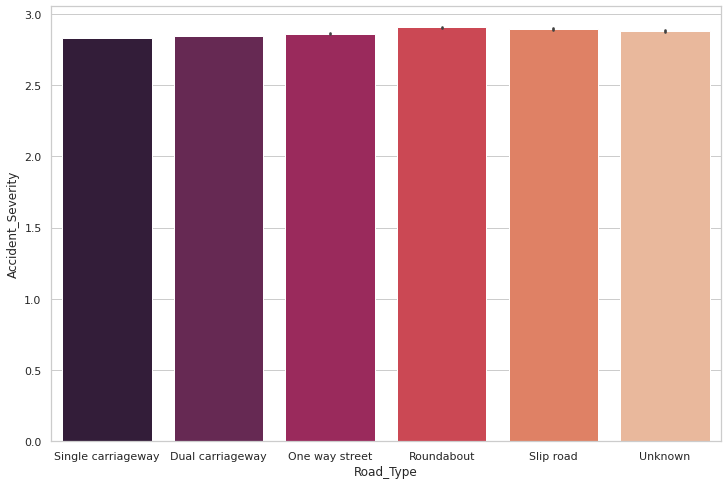

In [ ]:
plt.figure(figsize=(12,8))
sns.barplot(x = 'Road_Type', y = 'Accident_Severity', data = accident_severity_df, palette='rocket')

### Analysis based on Road Surface Condition and Accident Severity

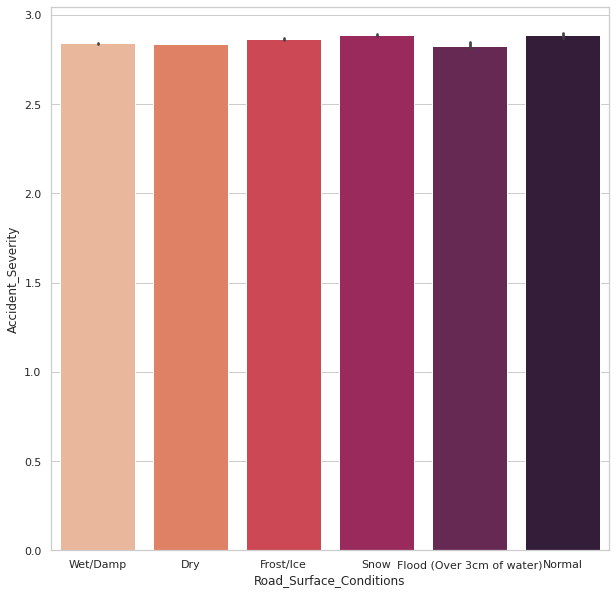

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(x = 'Road_Surface_Conditions', y = 'Accident_Severity', data = accident_severity_df, palette='rocket_r')

In [ ]:
accident_severity_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1504150 entries, 0 to 1504149
Data columns (total 33 columns):
 #   Column                                       Non-Null Count    Dtype  
---  ------                                       --------------    -----  
 0   Unnamed: 0                                   1504150 non-null  int64  
 1   Accident_Index                               1504150 non-null  object 
 2   Location_Easting_OSGR                        1504049 non-null  float64
 3   Location_Northing_OSGR                       1504150 non-null  float64
 4   Longitude                                    1504049 non-null  float64
 5   Latitude                                     1504150 non-null  float64
 6   Police_Force                                 1504150 non-null  int64  
 7   Accident_Severity                            1504150 non-null  int64  
 8   Number_of_Vehicles                           1504150 non-null  int64  
 9   Number_of_Casualties                         1

### Dropping all the columns which are of no use

In [ ]:
for feature in accident_severity_df.dtypes[accident_severity_df.dtypes == 'object'].index :
    accident_severity_df.drop(columns = feature, inplace = True)

In [ ]:
accident_severity_df = accident_severity_df.dropna()
accident_severity_df = accident_severity_df.drop(['Location_Easting_OSGR', 'Location_Northing_OSGR'], axis=1)

In [ ]:
accident_severity_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1504049 entries, 0 to 1504149
Data columns (total 16 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   Unnamed: 0                  1504049 non-null  int64  
 1   Longitude                   1504049 non-null  float64
 2   Latitude                    1504049 non-null  float64
 3   Police_Force                1504049 non-null  int64  
 4   Accident_Severity           1504049 non-null  int64  
 5   Number_of_Vehicles          1504049 non-null  int64  
 6   Number_of_Casualties        1504049 non-null  int64  
 7   Day_of_Week                 1504049 non-null  int64  
 8   Local_Authority_(District)  1504049 non-null  int64  
 9   1st_Road_Class              1504049 non-null  int64  
 10  1st_Road_Number             1504049 non-null  int64  
 11  Speed_limit                 1504049 non-null  int64  
 12  2nd_Road_Class              1504049 non-null  int64  
 1

In [ ]:
corr_matrix = accident_severity_df.corr()
corr_matrix

,Unnamed: 0,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),1st_Road_Class,1st_Road_Number,Speed_limit,2nd_Road_Class,2nd_Road_Number,Urban_or_Rural_Area,Year
Unnamed: 0,1.000000,-0.101058,-0.019529,0.333481,-0.011274,0.003463,0.005057,-0.001843,0.340384,0.017961,0.006340,0.081332,-0.042904,-0.003921,0.100066,0.102000
Longitude,-0.101058,1.000000,-0.432531,-0.369755,0.013946,0.018442,-0.039501,-0.001894,-0.390536,-0.058800,-0.082418,-0.062824,0.045050,0.001401,-0.094278,0.038059
Latitude,-0.019529,-0.432531,1.000000,0.165894,-0.031357,-0.041153,0.032251,0.003851,0.119492,0.035500,0.044789,0.047431,-0.030516,0.017623,0.053018,-0.013750
Police_Force,0.333481,-0.369755,0.165894,1.000000,-0.031705,-0.015480,0.007084,0.000422,0.981973,0.044903,-0.000176,0.197974,-0.119029,-0.018283,0.240768,-0.033532
Accident_Severity,-0.011274,0.013946,-0.031357,-0.031705,1.000000,0.075981,-0.083537,0.002961,-0.031990,0.012750,-0.004075,-0.079105,0.064329,0.026126,-0.082210,-0.005906
Number_of_Vehicles,0.003463,0.018442,-0.041153,-0.015480,0.075981,1.000000,0.237368,-0.000116,-0.010495,-0.142300,-0.008872,0.084781,0.068605,0.024326,0.041113,-0.007850
Number_of_Casualties,0.005057,-0.039501,0.032251,0.007084,-0.083537,0.237368,1.000000,-0.001457,0.014325,-0.082983,0.007742,0.139546,-0.029212,0.001997,0.116028,-0.015141
Day_of_Week,-0.001843,-0.001894,0.003851,0.000422,0.002961,-0.000116,-0.001457,1.000000,0.000320,0.006843,0.002339,-0.015951,0.007831,0.000396,-0.016594,-0.003663
Local_Authority_(District),0.340384,-0.390536,0.119492,0.981973,-0.031990,-0.010495,0.014325,0.000320,1.000000,0.055867,0.010460,0.204911,-0.119087,-0.016622,0.253747,-0.037009
1st_Road_Class,0.017961,-0.058800,0.035500,0.044903,0.012750,-0.142300,-0.082983,0.006843,0.055867,1.000000,-0.089205,-0.389877,0.103459,-0.033914,-0.226847,-0.010922


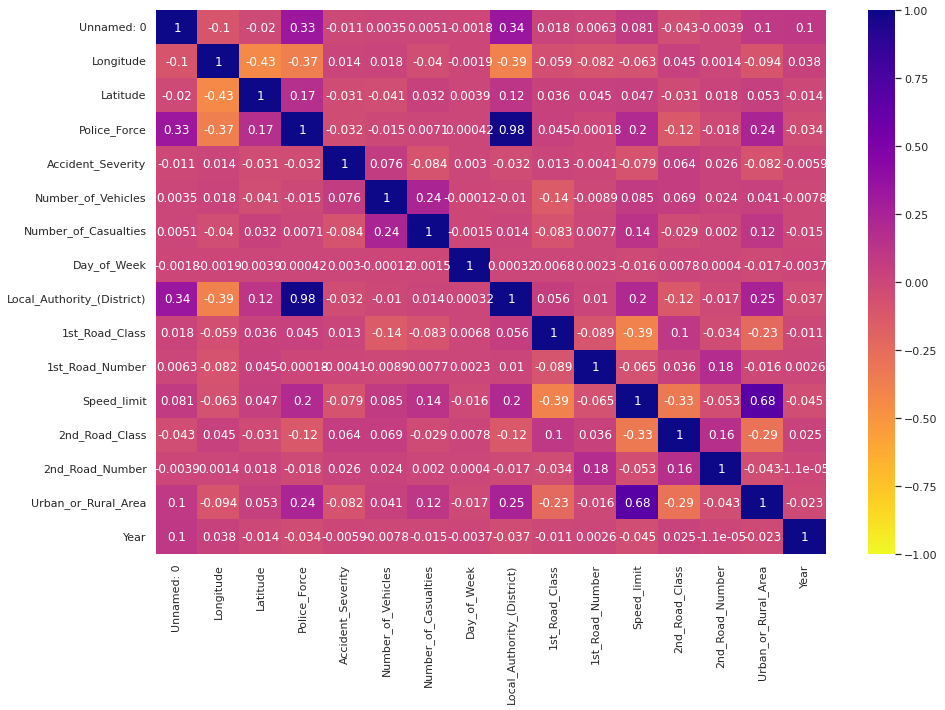

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix, annot=True, vmin=-1, cmap='plasma_r')

In [ ]:
final_accident_severity_dataframe = accident_severity_df.copy()
final_accident_severity_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1504049 entries, 0 to 1504149
Data columns (total 16 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   Unnamed: 0                  1504049 non-null  int64  
 1   Longitude                   1504049 non-null  float64
 2   Latitude                    1504049 non-null  float64
 3   Police_Force                1504049 non-null  int64  
 4   Accident_Severity           1504049 non-null  int64  
 5   Number_of_Vehicles          1504049 non-null  int64  
 6   Number_of_Casualties        1504049 non-null  int64  
 7   Day_of_Week                 1504049 non-null  int64  
 8   Local_Authority_(District)  1504049 non-null  int64  
 9   1st_Road_Class              1504049 non-null  int64  
 10  1st_Road_Number             1504049 non-null  int64  
 11  Speed_limit                 1504049 non-null  int64  
 12  2nd_Road_Class              1504049 non-null  int64  
 1

### Removing remaining highly correlated columns

In [ ]:
final_accident_severity_dataframe = final_accident_severity_dataframe.drop(['Police_Force', 'Local_Authority_(District)'], axis=1)

In [ ]:
# Impactful columns for Accident_Severity are as follows
final_accident_severity_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1504049 entries, 0 to 1504149
Data columns (total 14 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   Unnamed: 0            1504049 non-null  int64  
 1   Longitude             1504049 non-null  float64
 2   Latitude              1504049 non-null  float64
 3   Accident_Severity     1504049 non-null  int64  
 4   Number_of_Vehicles    1504049 non-null  int64  
 5   Number_of_Casualties  1504049 non-null  int64  
 6   Day_of_Week           1504049 non-null  int64  
 7   1st_Road_Class        1504049 non-null  int64  
 8   1st_Road_Number       1504049 non-null  int64  
 9   Speed_limit           1504049 non-null  int64  
 10  2nd_Road_Class        1504049 non-null  int64  
 11  2nd_Road_Number       1504049 non-null  int64  
 12  Urban_or_Rural_Area   1504049 non-null  int64  
 13  Year                  1504049 non-null  int64  
dtypes: float64(2), int64(12)
memory us

## Splitting Data set into X and Y Variable

In [ ]:
final_accident_severity_dataframe.head()

,Unnamed: 0,Longitude,Latitude,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,1st_Road_Class,1st_Road_Number,Speed_limit,2nd_Road_Class,2nd_Road_Number,Urban_or_Rural_Area,Year
0,0,-0.191170,51.489096,2,1,1,3,3,3218,30,-1,0,1,2005
1,1,-0.211708,51.520075,3,1,1,4,4,450,30,5,0,1,2005
2,2,-0.206458,51.525301,3,2,1,5,5,0,30,-1,0,1,2005
3,3,-0.173862,51.482442,3,1,1,6,3,3220,30,-1,0,1,2005
4,4,-0.156618,51.495752,3,1,1,2,6,0,30,-1,0,1,2005


In [ ]:
cols = ['Longitude', 'Latitude', 'Number_of_Vehicles', 'Number_of_Casualties', 'Day_of_Week',
                                                                           '1st_Road_Class', '1st_Road_Number', 'Speed_limit', '2nd_Road_Class', '2nd_Road_Number',
                                                                           'Urban_or_Rural_Area', 'Year']
# final_accident_severity_dataframe = final_accident_severity_dataframe.sample(10000)
X = final_accident_severity_dataframe[cols]
Y = final_accident_severity_dataframe['Accident_Severity']

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1504049 entries, 0 to 1504149
Data columns (total 12 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   Longitude             1504049 non-null  float64
 1   Latitude              1504049 non-null  float64
 2   Number_of_Vehicles    1504049 non-null  int64  
 3   Number_of_Casualties  1504049 non-null  int64  
 4   Day_of_Week           1504049 non-null  int64  
 5   1st_Road_Class        1504049 non-null  int64  
 6   1st_Road_Number       1504049 non-null  int64  
 7   Speed_limit           1504049 non-null  int64  
 8   2nd_Road_Class        1504049 non-null  int64  
 9   2nd_Road_Number       1504049 non-null  int64  
 10  Urban_or_Rural_Area   1504049 non-null  int64  
 11  Year                  1504049 non-null  int64  
dtypes: float64(2), int64(10)
memory usage: 149.2 MB


In [ ]:
len(Y)

1504049

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [ ]:
model_list = []
model_name = []

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
logistic_classifier = LogisticRegression()
logistic_classifier.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
log_y_pred = logistic_classifier.predict(X_test)

In [ ]:
print('Accuracy score for test data is:', accuracy_score(y_test,log_y_pred))
model_list.append(accuracy_score(y_test,log_y_pred))
model_name.append('Logistic Regression')

Accuracy score for test data is: 0.8510689789980665


# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
d_tree_classifier = DecisionTreeClassifier()
d_tree_classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
d_tree_y_pred = d_tree_classifier.predict(X_test)

In [ ]:
print('Accuracy score for test data is:', accuracy_score(y_test,d_tree_y_pred))
model_list.append(accuracy_score(y_test,d_tree_y_pred))
model_name.append('Decision Tree')

Accuracy score for test data is: 0.7526867422137


# KNN Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
knn_y_pred = knn_classifier.predict(X_test)

In [ ]:
print('Accuracy score for test data is:', accuracy_score(y_test,knn_y_pred))
model_list.append(accuracy_score(y_test,knn_y_pred))
model_name.append('KNN')

Accuracy score for test data is: 0.8323807953448418


# Random Forest

In [ ]:
# from sklearn.ensemble import RandomForestClassifier
# random_forest_classifier = RandomForestClassifier()
# random_forest_classifier.fit(X_train, y_train)

In [ ]:
# rf_y_pred = random_forest_classifier.predict(X_test)

In [ ]:
# print('Accuracy score for test data is:', accuracy_score(y_test,rf_y_pred))
# model_list.append(accuracy_score(y_test,rf_y_pred))
# model_name.append('Random Forest')

In [ ]:
model_list = [x * 100 for x in model_list]

In [ ]:
model_list

[85.10689789980665, 75.26867422137, 83.23807953448417]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


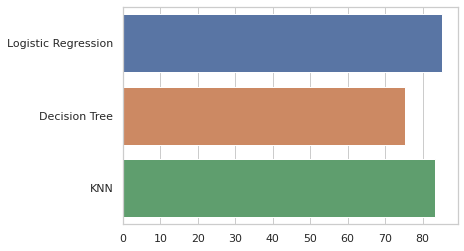

In [ ]:
sns.barplot(model_list, model_name)

### As we can see **K Nearest Neighbour** gives the highest accuracy among all the algorithms with unbaised results

In [ ]:
# from sklearn.model_selection import cross_val_score
# accuracies = cross_val_score(estimator = , X = X_train, y = y_train, cv = 10)

In [ ]:
# accuracies.mean() * 100

In [ ]:
result_X = X_test.copy()
result_Xp = X_test.copy()

In [ ]:
result_X['Severity'] = knn_y_pred

In [ ]:
result_X['Severity'].value_counts()

3    362510
2     12853
1       650
Name: Severity, dtype: int64

In [ ]:
# result_Xp['Severity'] = rf_y_pred

In [ ]:
# result_Xp['Severity'].unique()

In [ ]:
result_X['Severity'].unique()

array([1, 3, 2])

## Final Accuracy of the model is 83.12 %

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, knn_y_pred))

              precision    recall  f1-score   support

           1       0.07      0.01      0.02      4891
           2       0.23      0.06      0.09     51110
           3       0.86      0.97      0.91    320012

    accuracy                           0.83    376013
   macro avg       0.39      0.35      0.34    376013
weighted avg       0.76      0.83      0.79    376013



In [ ]:
dfx0 = result_X[result_X['Severity'] == 1]
dfx1 = result_X[result_X['Severity'] == 2]
dfx2 = result_X[result_X['Severity'] == 3]

In [ ]:
len(dfx2)

362510

In [ ]:
plotting_dfx0 = dfx0[['Severity', 'Latitude', 'Longitude']].sample(100).values.tolist()
plotting_dfx1 = dfx1[['Severity', 'Latitude', 'Longitude']].sample(100).values.tolist()
plotting_dfx2 = dfx2[['Severity', 'Latitude', 'Longitude']].sample(100).values.tolist()

In [ ]:
import folium

In [ ]:
map = folium.Map()

In [ ]:
fg = folium.FeatureGroup(name = 'plotting_dfx0')
for i in plotting_dfx0:
  fg.add_child(folium.Marker(location = [i[1], i[2]],popup = i[0], icon = folium.Icon(color = 'green')))

In [ ]:
map.add_child(fg)

In [ ]:
fg = folium.FeatureGroup(name = 'plotting_dfx1')
for i in plotting_dfx1:
  fg.add_child(folium.Marker(location = [i[1], i[2]],popup = i[0], icon = folium.Icon(color = 'blue')))

In [ ]:
map.add_child(fg)

In [ ]:
fg = folium.FeatureGroup(name = 'plotting_dfx2')
for i in plotting_dfx2:
  fg.add_child(folium.Marker(location = [i[1], i[2]],popup = i[0], icon = folium.Icon(color = 'red')))

In [ ]:
map.add_child(fg)